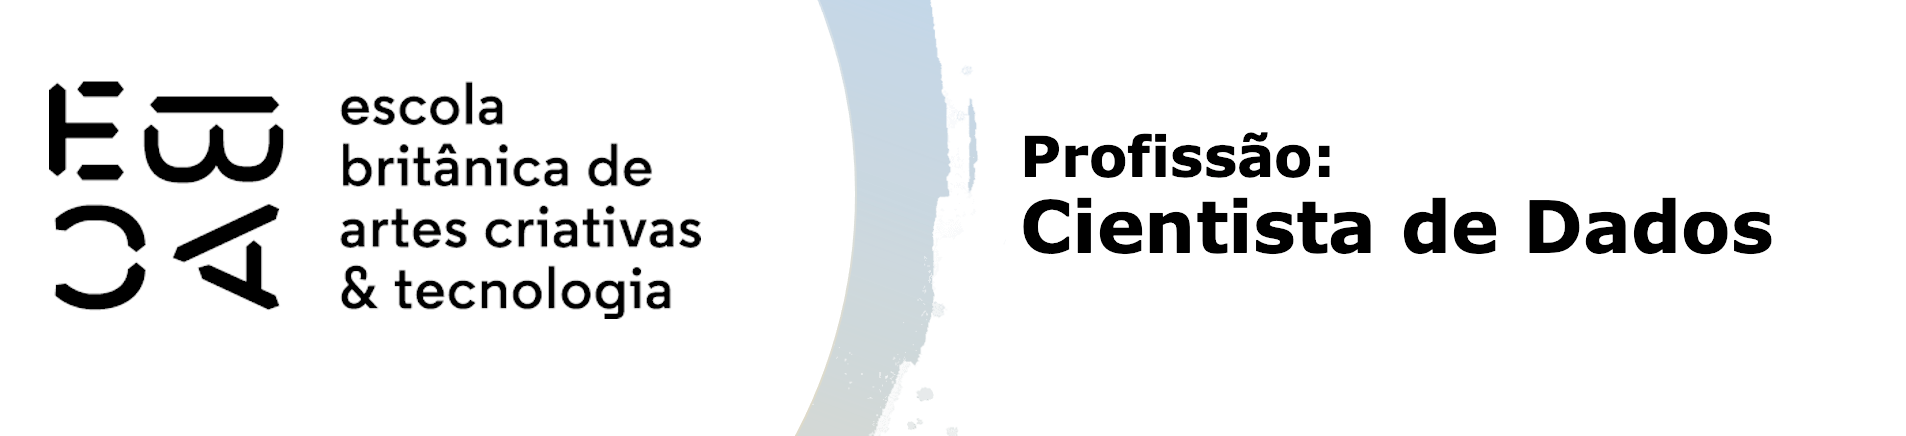

# Métodos hierárquicos de agrupamento - Tarefa

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [4]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

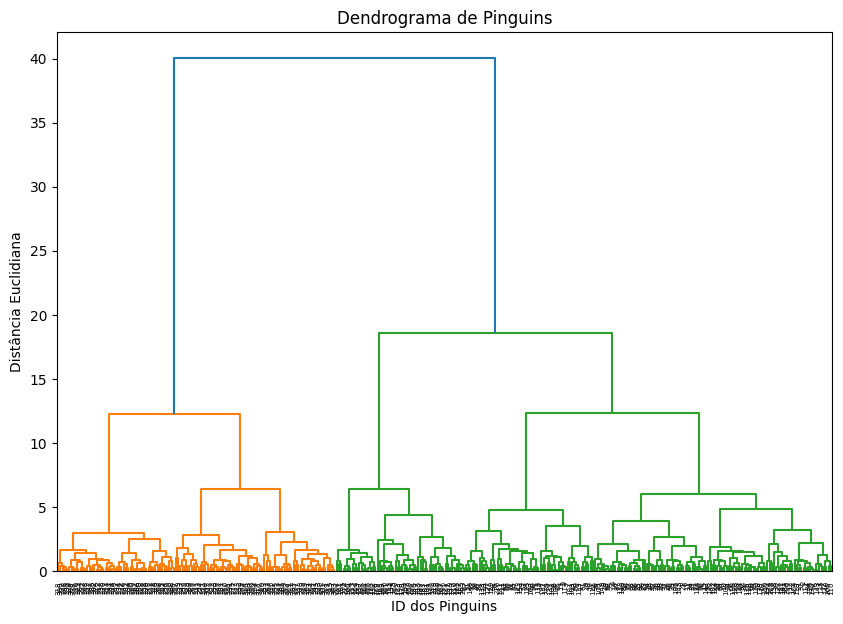

In [5]:
peng = sns.load_dataset('penguins')
peng.index.name = 'id'

peng_num = peng.select_dtypes(include='number').dropna()

scaler = StandardScaler()
peng_num_scaled = scaler.fit_transform(peng_num)

linkage_matrix = linkage(peng_num_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=peng_num.index)
plt.title('Dendrograma de Pinguins')
plt.xlabel('ID dos Pinguins')
plt.ylabel('Distância Euclidiana')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [7]:
# 1. Carregando a base de dados de pinguins
peng = sns.load_dataset('penguins').dropna()  # Eliminando dados faltantes
peng.index.name = 'id'

# 2. Selecionando variáveis quantitativas e padronizando os dados
peng_num = peng.select_dtypes(include='number')
scaler = StandardScaler()
peng_num_scaled = scaler.fit_transform(peng_num)

# 3. Realizando o agrupamento hierárquico com o método de Ward
linkage_matrix = linkage(peng_num_scaled, method='ward')

# 4. Definindo os grupos (cortando o dendrograma em 3 grupos)
groups = fcluster(linkage_matrix, t=3, criterion='maxclust')

# 5. Adicionando os grupos à base original
peng['Grupo'] = groups

# 6. Contando a quantidade de pinguins por espécie e grupo
group_species_count = peng.groupby(['Grupo', 'species']).size().unstack(fill_value=0)
print("Quantidade de pinguins de cada espécie por grupo:")
print(group_species_count)

# 7. Descrevendo as variáveis quantitativas por grupo
group_descriptions = peng.groupby('Grupo').describe()
print("\nDescrição das variáveis quantitativas por grupo:")
print(group_descriptions)


Quantidade de pinguins de cada espécie por grupo:
species  Adelie  Chinstrap  Gentoo
Grupo                             
1             0          0     119
2             0         57       0
3           146         11       0

Descrição das variáveis quantitativas por grupo:
      bill_length_mm                                                      \
               count       mean       std   min    25%   50%   75%   max   
Grupo                                                                      
1              119.0  47.568067  3.106116  40.9  45.35  47.4  49.6  59.6   
2               57.0  49.752632  2.710107  45.2  47.50  50.2  51.3  58.0   
3              157.0  39.191720  2.939670  32.1  37.00  39.1  41.1  46.9   

      bill_depth_mm             ... flipper_length_mm        body_mass_g  \
              count       mean  ...               75%    max       count   
Grupo                           ...                                        
1             119.0  14.996639  ...     

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [8]:
# 1. Carregando a base e eliminando valores faltantes
peng = sns.load_dataset('penguins').dropna()
peng.index.name = 'id'

# 2. Selecionando variáveis quantitativas e padronizando os dados
peng_num = peng.select_dtypes(include='number')
scaler = StandardScaler()
peng_num_scaled = scaler.fit_transform(peng_num)

# 3. Realizando o agrupamento hierárquico com o método de Ward
linkage_matrix = linkage(peng_num_scaled, method='ward')

# 4. Definindo 5 grupos (com base na nova análise visual do dendrograma)
groups = fcluster(linkage_matrix, t=5, criterion='maxclust')

# 5. Adicionando os grupos à base original
peng['Grupo'] = groups

# 6. Contando a quantidade de pinguins de cada espécie em cada grupo
group_species_count = peng.groupby(['Grupo', 'species']).size().unstack(fill_value=0)
print("Quantidade de pinguins de cada espécie por grupo:")
print(group_species_count)

# 7. Contando a quantidade de machos e fêmeas por espécie e grupo
group_gender_species = peng.groupby(['Grupo', 'species', 'sex']).size().unstack(fill_value=0)
print("\nQuantidade de pinguins por espécie e sexo em cada grupo:")
print(group_gender_species)

# 8. Descrição das variáveis quantitativas por grupo
group_descriptions = peng.groupby('Grupo').describe()
print("\nDescrição das variáveis quantitativas por grupo:")
print(group_descriptions)


Quantidade de pinguins de cada espécie por grupo:
species  Adelie  Chinstrap  Gentoo
Grupo                             
1             0          0      49
2             0          0      70
3             0         57       0
4            53          3       0
5            93          8       0

Quantidade de pinguins por espécie e sexo em cada grupo:
sex              Female  Male
Grupo species                
1     Gentoo         49     0
2     Gentoo          9    61
3     Chinstrap      23    34
4     Adelie          1    52
      Chinstrap       3     0
5     Adelie         72    21
      Chinstrap       8     0

Descrição das variáveis quantitativas por grupo:
      bill_length_mm                                                          \
               count       mean       std   min     25%    50%     75%   max   
Grupo                                                                          
1               49.0  45.151020  1.891001  40.9  43.500  45.30  46.500  49.1   
2      